In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 
import matplotlib as mpl
import matplotlib.ticker as mticker

#first importing the data using pandas 
sc_compact = 'sc_compact_1995_2019_d.csv'
dataframe = pd.read_csv(sc_compact)

omni_file = 'omni_min_2012.csv'
dataframe_omni = pd.read_csv(omni_file)

#dataframe had no datetime column so I created one
dataframe['datetime'] = dataframe.year.astype(str).str.cat(dataframe.month.astype(str),sep='-').str.cat(dataframe.day.astype(str), sep='-').str.cat(dataframe.hour.astype(str),sep=',').str.cat(dataframe.minute.astype(str),sep=':')

#making column with just time without date for graph
dataframe_omni['time'] = dataframe_omni.hour.astype(str).str.cat(dataframe_omni.minute.astype(str),sep='-')
dataframe_omni.time



0           0-0
1           0-1
2           0-2
3           0-3
4           0-4
          ...  
527035    23-55
527036    23-56
527037    23-57
527038    23-58
527039    23-59
Name: time, Length: 527040, dtype: object

In [3]:
#creating new dataframe of just 2012 dates
data12 = dataframe[dataframe.datetime.between('2012', '2013')]

#finding the data when the average amplitude is a maximum in 2012
data12.loc[data12['average_amplitude'] == data12['average_amplitude'].max()] 

data12.datetime


313      2012-1-22,6:11.4
314      2012-1-24,15:3.0
315     2012-2-26,21:39.2
316       2012-3-7,4:19.8
317       2012-3-8,11:3.0
318      2012-3-12,9:14.0
319      2012-3-15,13:6.4
320      2012-4-23,3:20.2
321     2012-5-21,19:36.8
322      2012-6-16,9:55.2
323     2012-6-16,20:19.0
324     2012-6-16,21:15.0
325      2012-7-14,18:9.0
326      2012-7-20,4:47.6
327      2012-7-21,16:5.4
328      2012-9-3,12:13.0
329     2012-9-30,11:31.6
330      2012-9-30,23:5.2
331    2012-10-31,15:38.2
332    2012-11-12,23:11.4
333    2012-11-23,21:51.8
Name: datetime, dtype: object

In [4]:
#using this to make another event graph from 12th March 2012 between 8.15am and 10.15am 
march12 = dataframe_omni[dataframe_omni.datetime.between('2012-03-12 08:14:00', '2012-03-12 10:16:00')]

bx = march12["bx"].tolist()
by_gse = march12["by_gse"].tolist()
bz_gse = march12["bz_gse"].tolist()
flow_pressure =march12["flow_pressure"].tolist()
flow_speed=march12["flow_speed"].tolist()
proton_density=march12["proton_density"].tolist()
symh=march12["symh"].tolist()
ae=march12["ae"].tolist()
au=march12["au"].tolist()
al=march12["al"].tolist()
pc_n=march12["pc_n"].tolist()
time=march12["time"].tolist()


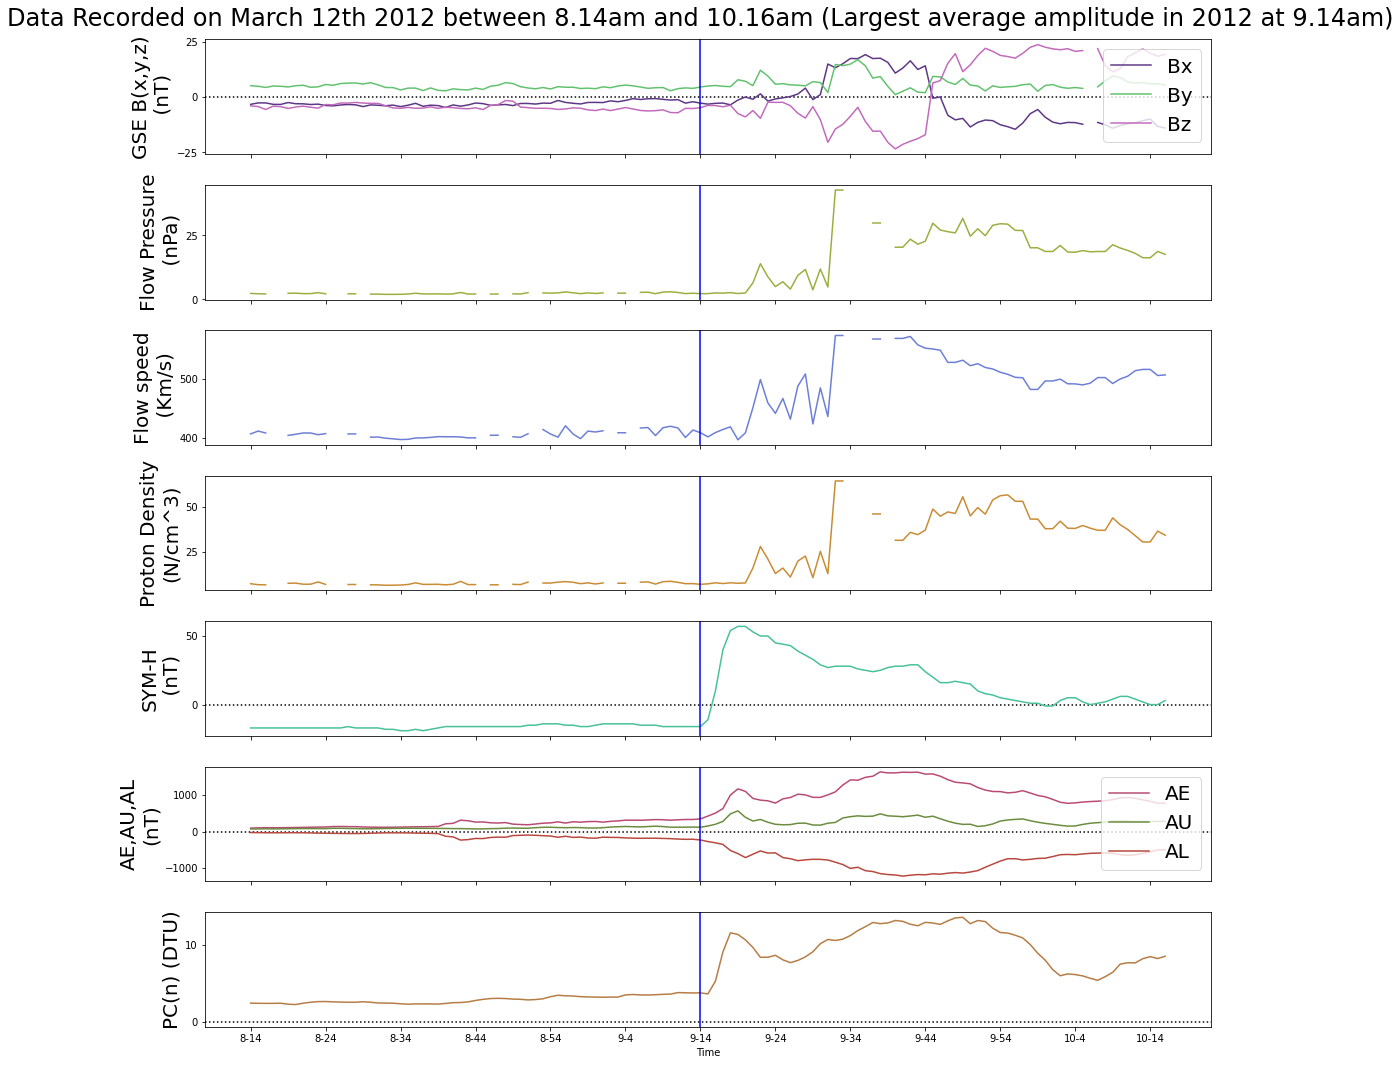

In [5]:
#adding in colour palette which I made using IwantHue
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=20)
plt.rc('axes', titlesize=15)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on March 12th 2012 between 8.14am and 10.16am (Largest average amplitude in 2012 at 9.14am)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel(r'GSE B(x,y,z)''\n'r' (nT)',fontsize=20)
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '9-14', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel(r'Flow Pressure''\n'r' (nPa)',fontsize=20)
ax2.axvline(x = '9-14', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel(r'Flow speed''\n'r' (Km/s)',fontsize=20)
ax3.axvline(x = '9-14', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel(r'Proton Density''\n'r'(N/cm^3)',fontsize=20)
ax4.axvline(x = '9-14', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel(r'SYM-H''\n'r' (nT)',fontsize=20)
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '9-14', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel(r'AE,AU,AL''\n' r'(nT)',fontsize=20)
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '9-14', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)', fontsize=20)
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '9-14', color = 'b', label = 'axvline - full height')


In [6]:
january22 = dataframe_omni[dataframe_omni.datetime.between('2012-01-22 05:10:00', '2012-01-22 07:12:00')]

bx = january22["bx"].tolist()
by_gse = january22["by_gse"].tolist()
bz_gse = january22["bz_gse"].tolist()
flow_pressure =january22["flow_pressure"].tolist()
flow_speed=january22["flow_speed"].tolist()
proton_density=january22["proton_density"].tolist()
symh=january22["symh"].tolist()
ae=january22["ae"].tolist()
au=january22["au"].tolist()
al=january22["al"].tolist()
pc_n=january22["pc_n"].tolist()
time=january22["time"].tolist()


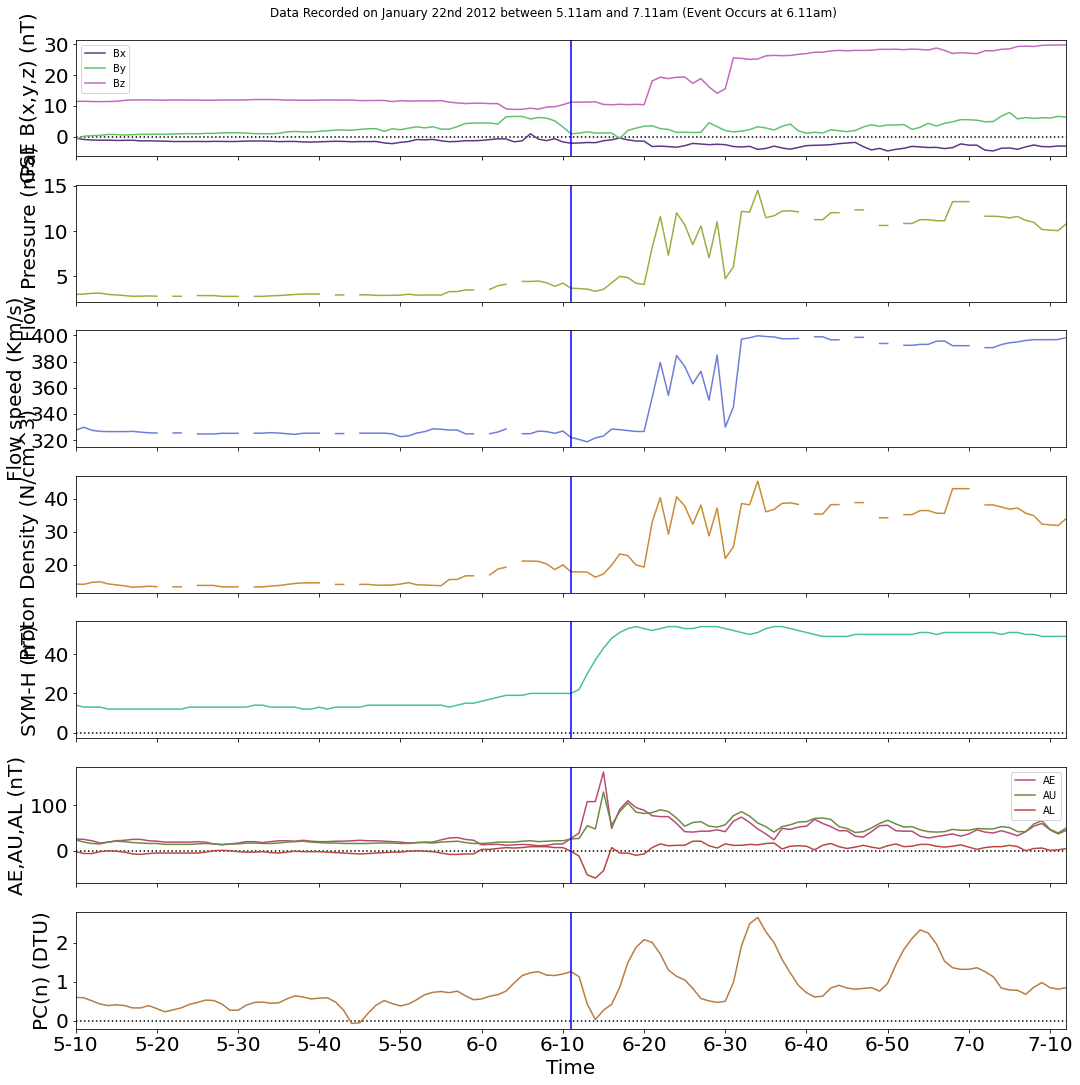

In [7]:
#adding in colour palette which I made using IwantHue
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on January 22nd 2012 between 5.11am and 7.11am (Event Occurs at 6.11am)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '6-11', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '6-11', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '6-11', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '6-11', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '6-11', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '6-11', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '6-11', color = 'b', label = 'axvline - full height')


In [8]:
Febuary26 = dataframe_omni[dataframe_omni.datetime.between('2012-02-26 20:38:00', '2012-02-26 22:40:00')]

bx = Febuary26["bx"].tolist()
by_gse = Febuary26["by_gse"].tolist()
bz_gse = Febuary26["bz_gse"].tolist()
flow_pressure =Febuary26["flow_pressure"].tolist()
flow_speed=Febuary26["flow_speed"].tolist()
proton_density=Febuary26["proton_density"].tolist()
symh=Febuary26["symh"].tolist()
ae=Febuary26["ae"].tolist()
au=Febuary26["au"].tolist()
al=Febuary26["al"].tolist()
pc_n=Febuary26["pc_n"].tolist()
time=Febuary26["time"].tolist()


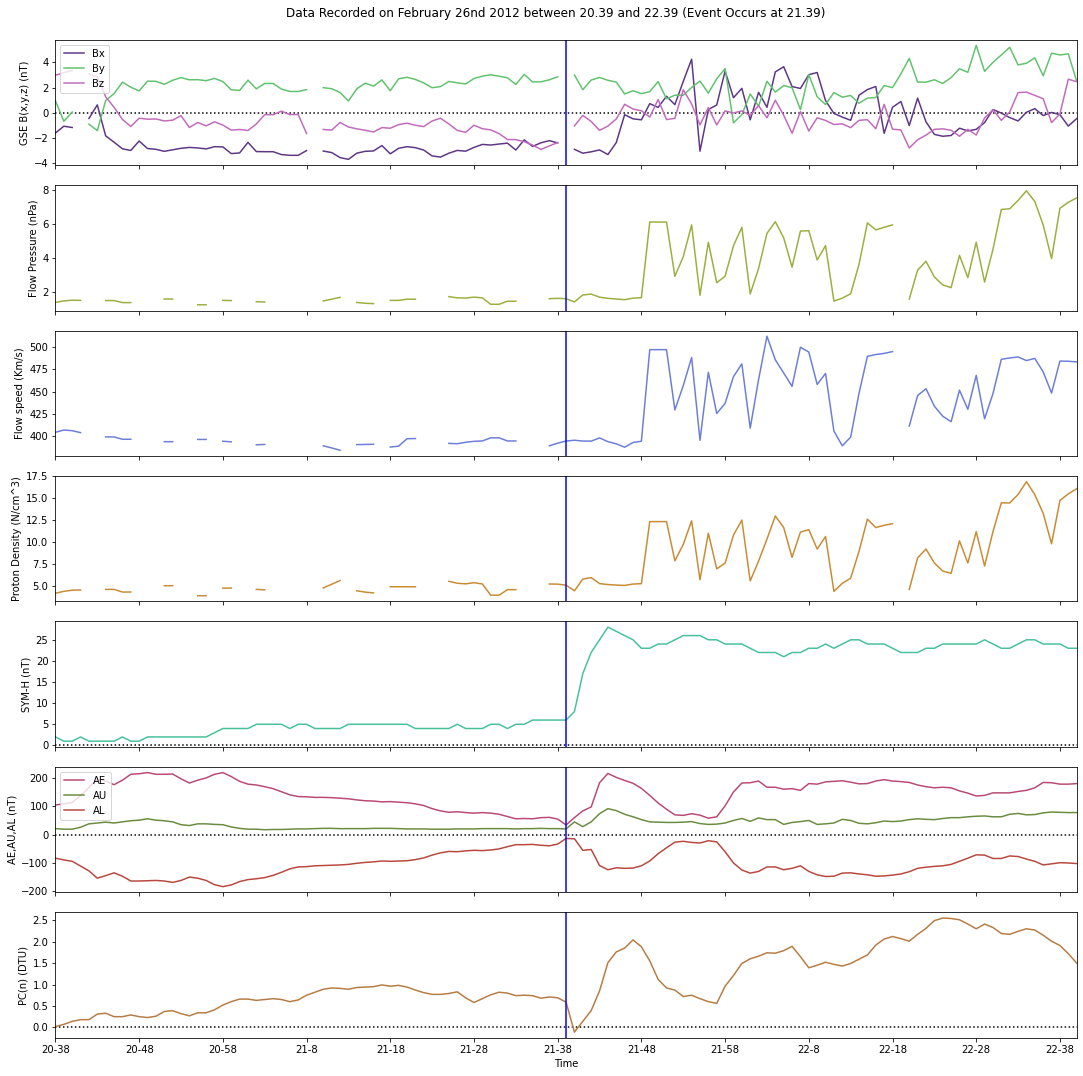

In [9]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on February 26nd 2012 between 20.39 and 22.39 (Event Occurs at 21.39)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '21-39', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '21-39', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '21-39', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '21-39', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '21-39', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '21-39', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '21-39', color = 'b', label = 'axvline - full height')


In [10]:
april23 = dataframe_omni[dataframe_omni.datetime.between('2012-04-23 02:19:00', '2012-04-23 04:21:00')]

bx = april23 ["bx"].tolist()
by_gse = april23 ["by_gse"].tolist()
bz_gse = april23 ["bz_gse"].tolist()
flow_pressure =april23 ["flow_pressure"].tolist()
flow_speed=april23 ["flow_speed"].tolist()
proton_density=april23 ["proton_density"].tolist()
symh=april23 ["symh"].tolist()
ae=april23 ["ae"].tolist()
au=april23 ["au"].tolist()
al=april23 ["al"].tolist()
pc_n=april23 ["pc_n"].tolist()
time=april23 ["time"].tolist()

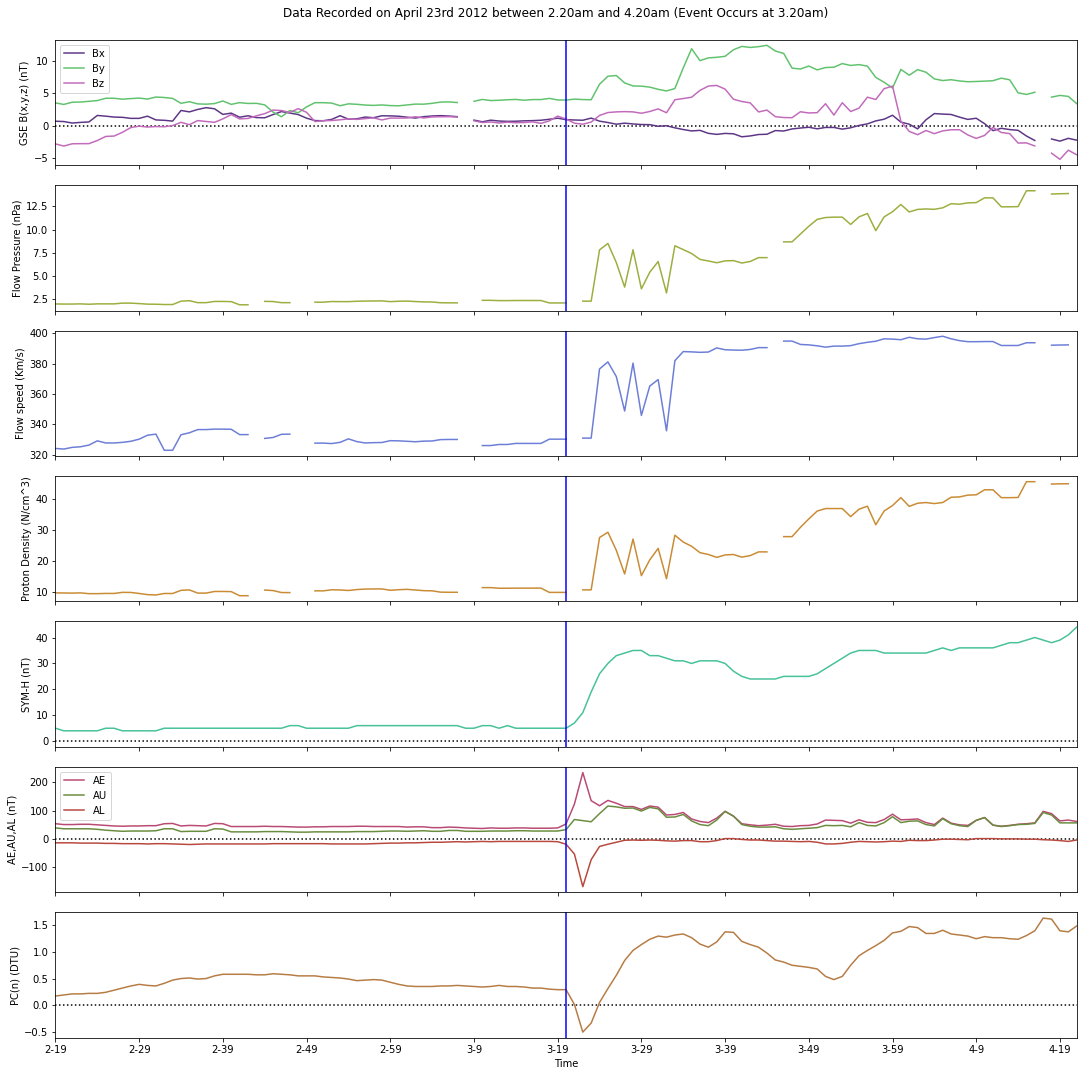

In [11]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on April 23rd 2012 between 2.20am and 4.20am (Event Occurs at 3.20am)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '3-20', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '3-20', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '3-20', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '3-20', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '3-20', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '3-20', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '3-20', color = 'b', label = 'axvline - full height')


In [12]:
may21 = dataframe_omni[dataframe_omni.datetime.between('2012-05-21 18:35:00', '2012-05-21 20:37:00')]

bx =  may21["bx"].tolist()
by_gse = may21["by_gse"].tolist()
bz_gse = may21 ["bz_gse"].tolist()
flow_pressure =may21["flow_pressure"].tolist()
flow_speed=may21 ["flow_speed"].tolist()
proton_density=may21 ["proton_density"].tolist()
symh=may21 ["symh"].tolist()
ae=may21["ae"].tolist()
au=may21 ["au"].tolist()
al=may21 ["al"].tolist()
pc_n=may21 ["pc_n"].tolist()
time=may21 ["time"].tolist()

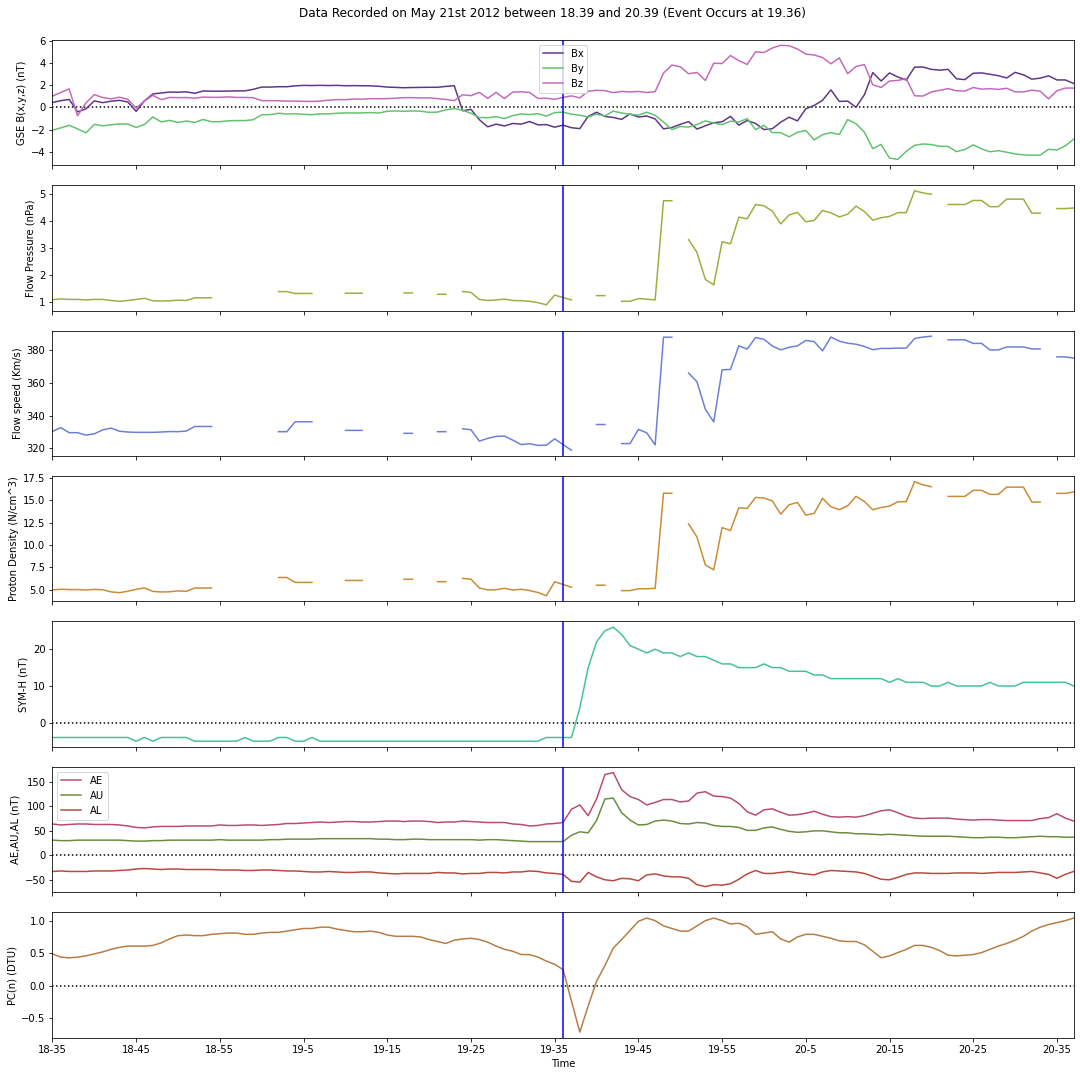

In [13]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on May 21st 2012 between 18.39 and 20.39 (Event Occurs at 19.36)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '19-36', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '19-36', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '19-36', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '19-36', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '19-36', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '19-36', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '19-36', color = 'b', label = 'axvline - full height')


In [14]:
july20 =  dataframe_omni[dataframe_omni.datetime.between('2012-07-20 03:46:00', '2012-07-20 05:48:00')]

bx =  july20["bx"].tolist()
by_gse = july20["by_gse"].tolist()
bz_gse = july20 ["bz_gse"].tolist()
flow_pressure =july20["flow_pressure"].tolist()
flow_speed=july20 ["flow_speed"].tolist()
proton_density=july20 ["proton_density"].tolist()
symh=july20 ["symh"].tolist()
ae=july20["ae"].tolist()
au=july20["au"].tolist()
al=july20 ["al"].tolist()
pc_n=july20 ["pc_n"].tolist()
time=july20 ["time"].tolist()

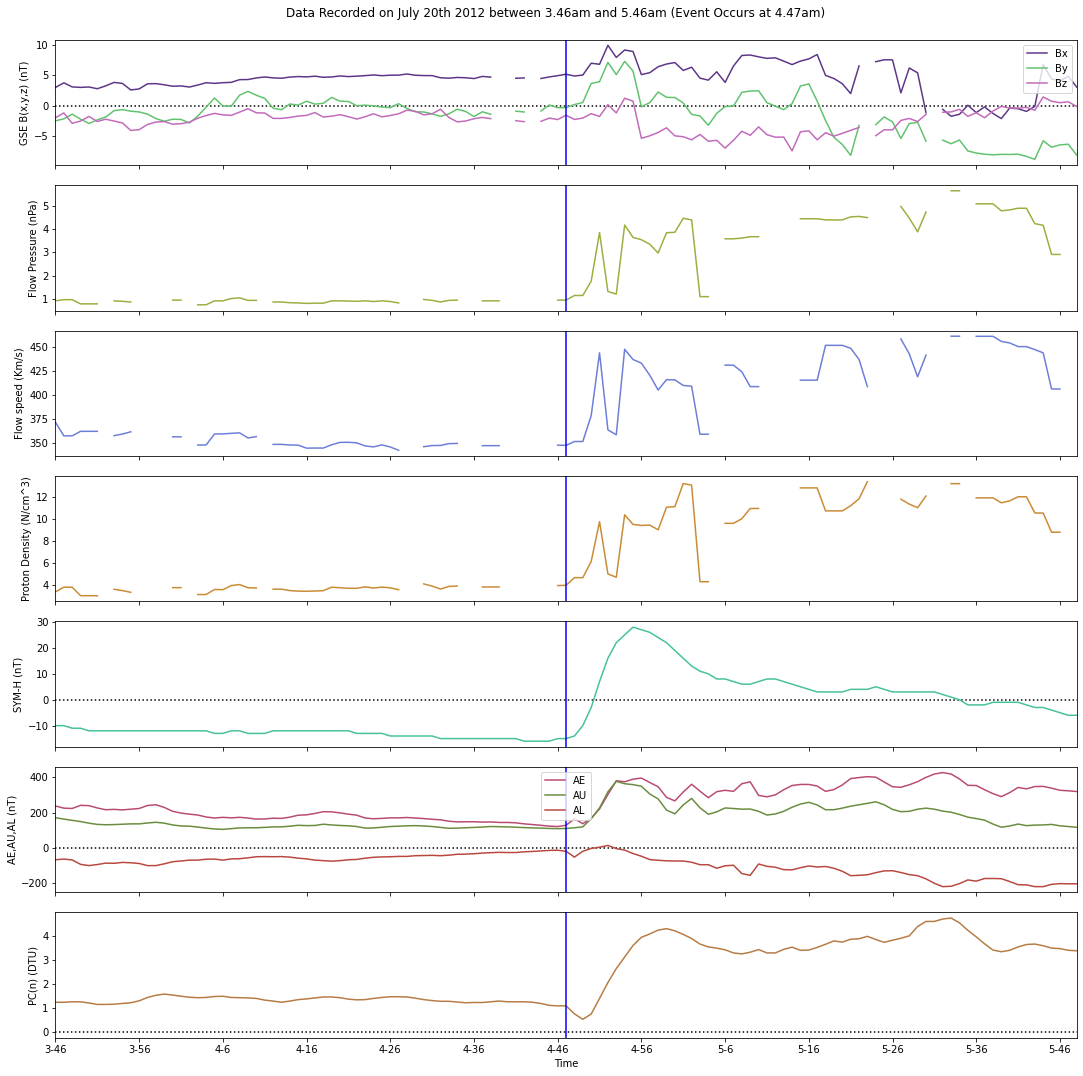

In [15]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on July 20th 2012 between 3.46am and 5.46am (Event Occurs at 4.47am)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '4-47', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '4-47', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '4-47', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '4-47', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '4-47', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '4-47', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '4-47', color = 'b', label = 'axvline - full height')


In [16]:
september30 =  dataframe_omni[dataframe_omni.datetime.between('2012-09-30 10:30:00', '2012-09-30 23:59:00')]

bx = september30 ["bx"].tolist()
by_gse = september30["by_gse"].tolist()
bz_gse = september30["bz_gse"].tolist()
flow_pressure =september30["flow_pressure"].tolist()
flow_speed=september30["flow_speed"].tolist()
proton_density=september30 ["proton_density"].tolist()
symh=september30["symh"].tolist()
ae=september30["ae"].tolist()
au=september30["au"].tolist()
al=september30["al"].tolist()
pc_n=september30["pc_n"].tolist()
time=september30["time"].tolist()

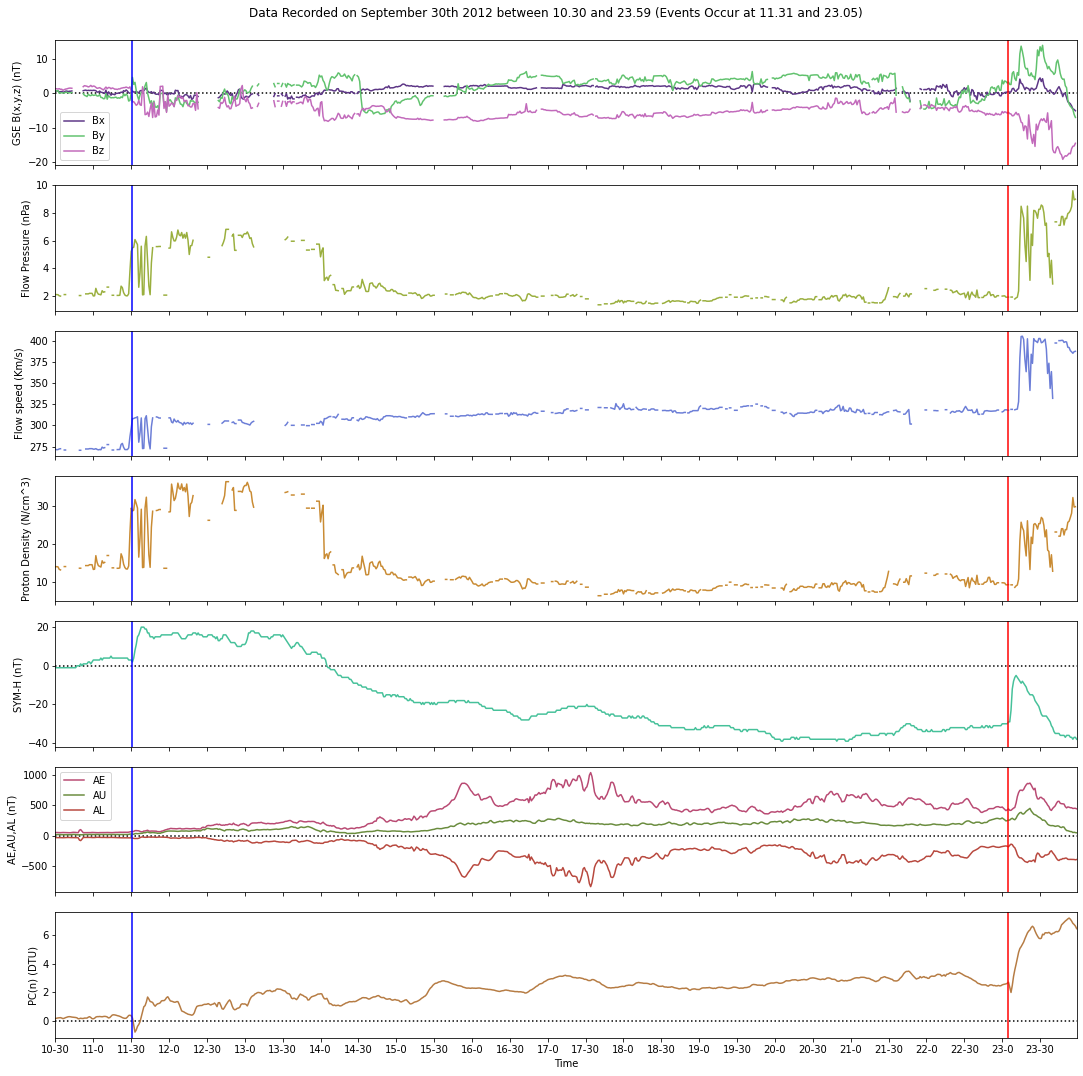

In [17]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(30)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on September 30th 2012 between 10.30 and 23.59 (Events Occur at 11.31 and 23.05)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax1.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax2.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax3.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax4.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax5.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax6.axvline(x = '23-5', color = 'r', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '11-31', color = 'b', label = 'axvline - full height')
ax7.axvline(x = '23-5', color = 'r', label = 'axvline - full height')


In [26]:
october31 =  dataframe_omni[dataframe_omni.datetime.between('2012-10-31 14:40:00', '2012-10-31 16:40:00')]

bx =  october31["bx"].tolist()
by_gse = october31["by_gse"].tolist()
bz_gse = october31["bz_gse"].tolist()
flow_pressure =october31["flow_pressure"].tolist()
flow_speed=october31["flow_speed"].tolist()
proton_density=october31 ["proton_density"].tolist()
symh=october31 ["symh"].tolist()
ae=october31["ae"].tolist()
au=october31["au"].tolist()
al=october31["al"].tolist()
pc_n=october31["pc_n"].tolist()
time1=october31["time"].tolist()

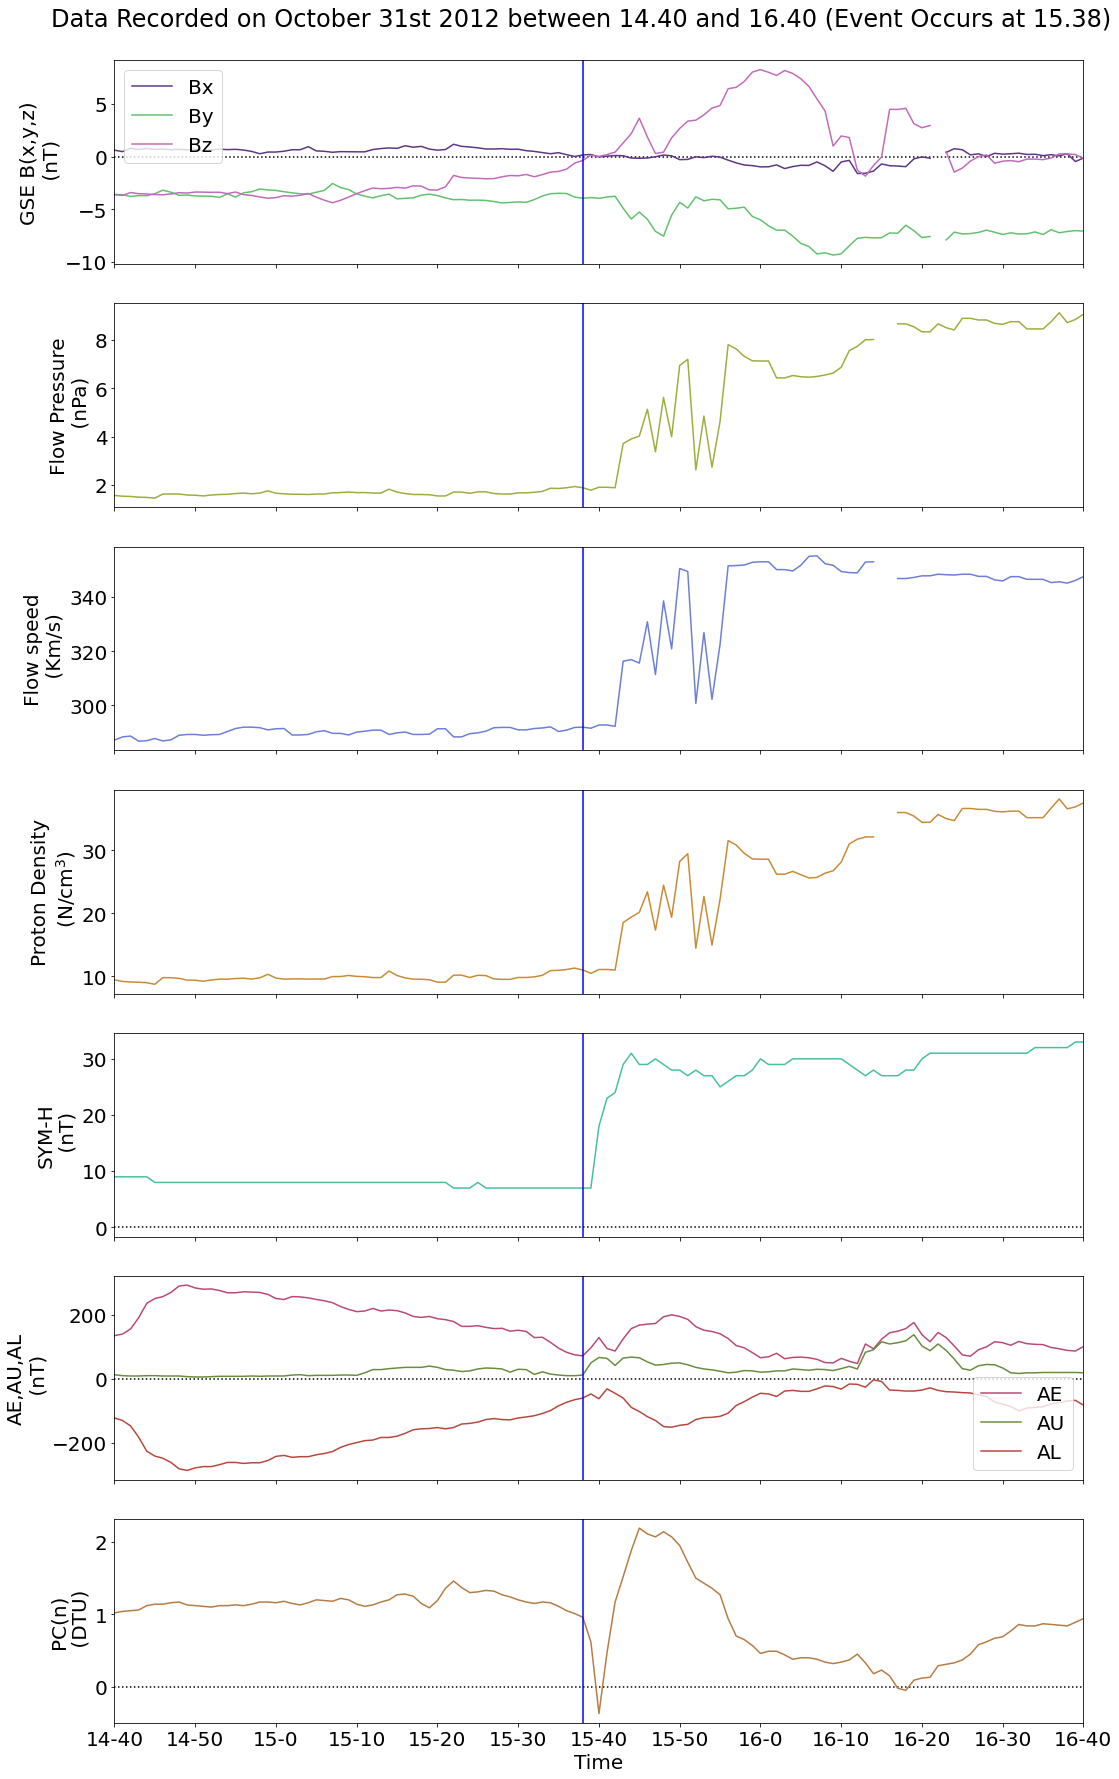

In [28]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=20)
plt.rc('axes', titlesize=25)
fig.set_figheight(25)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on October 31st 2012 between 14.40 and 16.40 (Event Occurs at 15.38)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time1,bx, color = colour[0])
ax1.plot(time1,by_gse, color = colour[1])
ax1.plot(time1,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel(r'GSE B(x,y,z)''\n'r' (nT)',fontsize=20)
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '15-38', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time1,flow_pressure, color = colour[3])
ax2.set_ylabel(r'Flow Pressure''\n'r' (nPa)',fontsize=20)
ax2.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time1,flow_speed, color = colour[4])
ax3.set_ylabel(r'Flow speed''\n'r' (Km/s)',fontsize=20)
ax3.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time1,proton_density, color = colour[5])
ax4.set_ylabel(r'Proton Density' '\n'r' (N/cm$^3$)',fontsize=20)
ax4.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time1,symh, color = colour[6])
ax5.set_ylabel(r'SYM-H''\n'r' (nT)',fontsize=20)
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time1,ae, color = colour[7])
ax6.plot(time1,au, color = colour[8])
ax6.plot(time1,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel(r'AE,AU,AL''\n'r' (nT)',fontsize=20)
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time1,pc_n, color = colour[10])
ax7.set_ylabel(r'PC(n)''\n'r' (DTU)',fontsize=20)
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '15-38', color = 'b', label = 'axvline - full height')

In [20]:
november23 = dataframe_omni[dataframe_omni.datetime.between('2012-11-23 20:50:00', '2012-11-23 22:50:00')]

bx =  november23["bx"].tolist()
by_gse = november23["by_gse"].tolist()
bz_gse = november23["bz_gse"].tolist()
flow_pressure =november23["flow_pressure"].tolist()
flow_speed=november23["flow_speed"].tolist()
proton_density=november23 ["proton_density"].tolist()
symh=november23["symh"].tolist()
ae=november23["ae"].tolist()
au=november23["au"].tolist()
al=november23["al"].tolist()
pc_n=november23["pc_n"].tolist()
time=november23["time"].tolist()

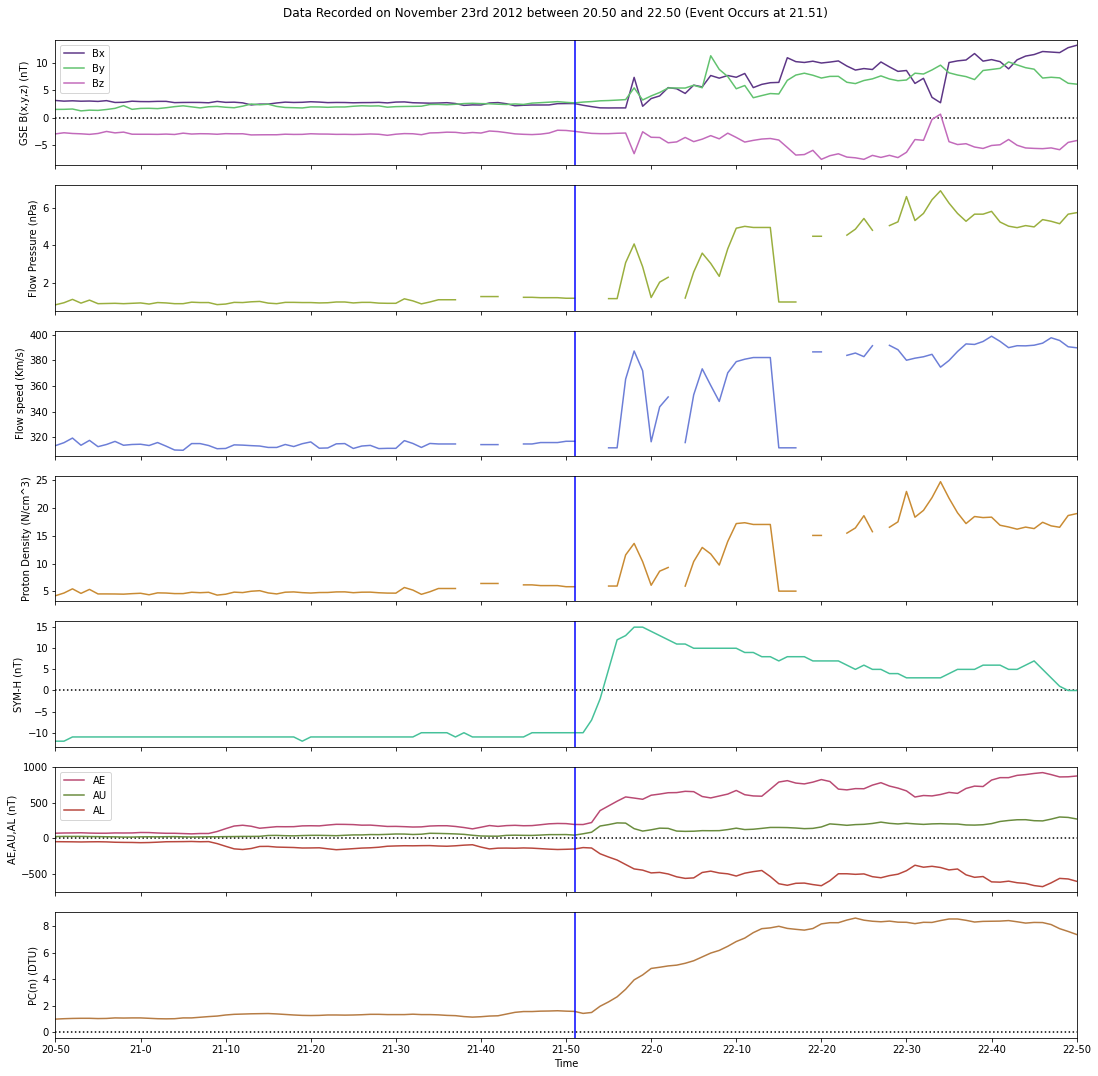

In [21]:
colour = ["#5d3686",
"#61c26e",
"#c26abb",
"#9aaf3e",
"#6c7ed7",
"#c98b33",
"#46c19a",
"#b94a73",
"#6a8c3e",
"#b8483e",
"#b67c44"]

#making an eleven panel figure with each parameter 
fig, (ax1, ax2, ax3, ax4, ax5, ax6,ax7) = plt.subplots(7,sharex=True)

#setting font sizes, heights and widths of each panel so the graph is clear
plt.rc('font', size=10)
plt.rc('axes', titlesize=8)
fig.set_figheight(15)
fig.set_figwidth(15)

#setting it to remove issue with whitespace between title and figure and at margins 
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.rcParams['axes.xmargin'] = 0

#to avoid overlap of the times on the x-axis, I am only displayign multiples of 10
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
ax7.xaxis.set_major_locator(myLocator)

    
#beggining to plot each with titles 
fig.suptitle('Data Recorded on November 23rd 2012 between 20.50 and 22.50 (Event Occurs at 21.51)')
plt.xlabel('Time')

#plotting magnetic field in x,y,z directions 
ax1.plot(time,bx, color = colour[0])
ax1.plot(time,by_gse, color = colour[1])
ax1.plot(time,bz_gse, color = colour[2])
ax1.legend(['Bx','By','Bz'])
ax1.set_ylabel('GSE B(x,y,z) (nT)')
ax1.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)

#blue line indicated the time in each panel when the average amplitude is at a max 
ax1.axvline(x = '21-51', color = 'b', label = 'axvline - full height')


#plotting flow pressure 
ax2.plot(time,flow_pressure, color = colour[3])
ax2.set_ylabel('Flow Pressure (nPa)')
ax2.axvline(x = '21-51', color = 'b', label = 'axvline - full height')

#plotting flow speed 
ax3.plot(time,flow_speed, color = colour[4])
ax3.set_ylabel('Flow speed (Km/s)')
ax3.axvline(x = '21-51', color = 'b', label = 'axvline - full height')

#plotting proton density 
ax4.plot(time,proton_density, color = colour[5])
ax4.set_ylabel('Proton Density (N/cm^3)')
ax4.axvline(x = '21-51', color = 'b', label = 'axvline - full height')

#plotting sym-H 
ax5.plot(time,symh, color = colour[6])
ax5.set_ylabel('SYM-H (nT)')
ax5.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax5.axvline(x = '21-51', color = 'b', label = 'axvline - full height')

#Plotting AE, AU, AL
ax6.plot(time,ae, color = colour[7])
ax6.plot(time,au, color = colour[8])
ax6.plot(time,al, color = colour[9])
ax6.legend(['AE', 'AU','AL'])
ax6.set_ylabel('AE,AU,AL (nT)')
ax6.axhline(y=0, xmin=0, xmax=3, c="black", linestyle=':', zorder=0)
ax6.axvline(x = '21-51', color = 'b', label = 'axvline - full height')

#plotting PC(n)
ax7.plot(time,pc_n, color = colour[10])
ax7.set_ylabel('PC(n) (DTU)')
ax7.axhline(y=0, xmin=0, xmax=3, c="black",linestyle=':', zorder=0)
ax7.axvline(x = '21-51', color = 'b', label = 'axvline - full height')